# Bibiotecas

In [1]:
import shutil
import os
from sklearn.model_selection import train_test_split
import glob

# Dataset

In [2]:
# Baixando
!wget http://ai.stanford.edu/~jkrause/car196/bmw10_release.tgz

--2023-04-02 15:31:48--  http://ai.stanford.edu/~jkrause/car196/bmw10_release.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59628953 (57M) [application/x-gzip]
Saving to: ‘bmw10_release.tgz’

bmw10_release.tgz   100%[===================>]  56.87M  14.5MB/s    in 7.1s    

2023-04-02 15:31:55 (8.00 MB/s) - ‘bmw10_release.tgz’ saved [59628953/59628953]



In [3]:
# Descompactando
# !tar -xvf  'file.tar' -C 'destination'
!tar -xvf  '/content/bmw10_release.tgz' -C '/content/'

bmw10_ims/
bmw10_ims/10/
bmw10_ims/10/150303361.jpg
bmw10_ims/10/150303689.jpg
bmw10_ims/10/150304122.jpg
bmw10_ims/10/150304536.jpg
bmw10_ims/10/150302397.jpg
bmw10_ims/10/150304216.jpg
bmw10_ims/10/150304396.jpg
bmw10_ims/10/150302795.jpg
bmw10_ims/10/150303565.jpg
bmw10_ims/10/150303015.jpg
bmw10_ims/10/150303922.jpg
bmw10_ims/10/150304871.jpg
bmw10_ims/10/150302515.jpg
bmw10_ims/10/150304453.jpg
bmw10_ims/10/150304421.jpg
bmw10_ims/10/150304828.jpg
bmw10_ims/10/150304381.jpg
bmw10_ims/10/150303002.jpg
bmw10_ims/10/150304813.jpg
bmw10_ims/10/150304132.jpg
bmw10_ims/10/150302770.jpg
bmw10_ims/10/150302307.thumb.jpg
bmw10_ims/10/150302884.jpg
bmw10_ims/10/150304480.thumb.jpg
bmw10_ims/10/150304550.jpg
bmw10_ims/10/150302686.jpg
bmw10_ims/10/150304261.jpg
bmw10_ims/10/150303349.jpg
bmw10_ims/10/150304672.jpg
bmw10_ims/10/150303829.jpg
bmw10_ims/10/150304740.jpg
bmw10_ims/10/150304294.jpg
bmw10_ims/10/150304410.jpg
bmw10_ims/10/150303122.jpg
bmw10_ims/10/150303008.jpg
bmw10_ims/10/15030

In [43]:
# Requisitos da Prova

src_3 = '/content/bmw10_ims/3'
dst_3 = '/content/Dataset_Mobit/3'
shutil.copytree(src_3, dst_3)

src_4 = '/content/bmw10_ims/4'
dst_4 = '/content/Dataset_Mobit/4'
shutil.copytree(src_4, dst_4)

src_5 = '/content/bmw10_ims/5'
dst_5 = '/content/Dataset_Mobit/5'
shutil.copytree(src_5, dst_5)

# src_ = '/content/bmw10_ims/1'
# dst_ = '/content/Dataset_Mobit/indefinido'
# shutil.copytree(src_, dst_, dirs_exist_ok=True)
# src_ = '/content/bmw10_ims/2'
# dst_ = '/content/Dataset_Mobit/indefinido'
# shutil.copytree(src_, dst_, dirs_exist_ok=True)
# src_ = '/content/bmw10_ims/6'
# dst_ = '/content/Dataset_Mobit/indefinido'
# shutil.copytree(src_, dst_, dirs_exist_ok=True)
# src_ = '/content/bmw10_ims/7'
# dst_ = '/content/Dataset_Mobit/indefinido'
# shutil.copytree(src_, dst_, dirs_exist_ok=True)
# src_ = '/content/bmw10_ims/8'
# dst_ = '/content/Dataset_Mobit/indefinido'
# shutil.copytree(src_, dst_, dirs_exist_ok=True)
# src_ = '/content/bmw10_ims/10'
# dst_ = '/content/Dataset_Mobit/indefinido'
# shutil.copytree(src_, dst_, dirs_exist_ok=True)
# src_ = '/content/bmw10_ims/11'
# dst_ = '/content/Dataset_Mobit/indefinido'
# shutil.copytree(src_, dst_, dirs_exist_ok=True)

'/content/Dataset_Mobit/5'

Distribuição quantitativa de imagens por classe:


1.   Classe 3: 50 Imagens
2.   Classe 4: 50 Imagens
3.   Classe 5: 52 Imagens




In [44]:
files = glob.glob('/content/Dataset_Mobit/**/*.jp*', 
                   recursive = True)

y = []
X = []
for file in files:
    y.append(file.split('/')[3])
    X.append(file)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=42, 
                                   test_size=0.30, 
                                   shuffle=True, stratify=y)

In [47]:
path_newDir = "/content/Dataset_Oficial"
if not os.path.exists(path_newDir):
        
      # if the demo_folder directory is not present 
      # then create it.
      os.makedirs(path_newDir)

for file_train, label_train in zip(X_train, y_train):
  # exist or not.
  label_train = 'train/'+label_train
  path_save = os.path.join(path_newDir,label_train)
  if not os.path.exists(path_save):
        
      # if the demo_folder directory is not present 
      # then create it.
      os.makedirs(path_save)

  shutil.move(file_train,path_save)

for file_test, label_test in zip(X_test, y_test):
  # exist or not.
  label_test = 'test/'+label_test
  path_save = os.path.join(path_newDir,label_test)
  if not os.path.exists(path_save):
        
      # if the demo_folder directory is not present 
      # then create it.
      os.makedirs(path_save)

  shutil.move(file_test,path_save)

# Treino

In [48]:
# from tensorflow.keras.applications.resnet50 import preprocess_input
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import os
import itertools
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
# from keras.utils import np_utils
# from keras.layers import Input
# from keras.layers.merge import add, concatenate
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D


In [49]:
# Carregar o dataset
def load_dataset(TRAINING_DIR, TEST_DIR, im_shape, seed, BATCH_SIZE):
    """
        Funcao responsavel por carregar as imagens no disco

        Arguments:
          TRAINING_DIR: str -- Caminho do dataset de treinamento
          TEST_DIR: str -- Caminho do dataset de teste
          VAL_DIR: str -- Caminho para as imagens de validação
          im_shape: tuple -- Shape das imagens
          seed: int --
          BATCH_SIZE: int -- Controla o número de amostras de treinamento a serem trabalhadas

        Return:
          train_generator: Imagens de treinamento carregadas atraves do metodo generator do Keras
          validation_generator: Imagens de validação carregadas atraves do metodo generator do Keras
          test_generator: Imagens de teste carregadas atraves do metodo generator do Keras
          nb_train_samples: int -- Quantidade de imagens para treinamento
          nb_validation_samples: int -- Quantidade de imagens para validação
          nb_test_samples: int -- Quantidade de imagens para teste
          num_classes: int -- Quantidade de classes
          classes: list -- Lista das classes
    """
    # # Dataset SEM Data Augmentation
    # data_generator = ImageDataGenerator(
    #     preprocessing_function=preprocess_input)

    # Dataset COM Data Augmentation
    data_generator = ImageDataGenerator(    
                            rotation_range=1,
                            zoom_range=0.08,
                            vertical_flip=True,
                            horizontal_flip=True,
                            preprocessing_function=preprocess_input) 

    val_data_generator = ImageDataGenerator(
        preprocessing_function=preprocess_input)

    # Generator para parte train
    train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                         class_mode='categorical', batch_size=BATCH_SIZE,
                                                         subset="training")
    # Generator para parte validação
    # validation_generator = val_data_generator.flow_from_directory(VAL_DIR, target_size=im_shape, shuffle=False,
    #                                                               seed=seed,
    #                                                               class_mode='categorical', batch_size=BATCH_SIZE)

    # Generator para dataset de teste
    test_generator = ImageDataGenerator(
        preprocessing_function=preprocess_input)
    
    test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                        class_mode='categorical', batch_size=BATCH_SIZE)

    nb_train_samples = train_generator.samples
    # nb_validation_samples = validation_generator.samples
    nb_test_samples = test_generator.samples

    classes = list(train_generator.class_indices.keys())
    print('Classes_train: ' + str(classes))

    # classes_val = list(validation_generator.class_indices.keys())
    # print('Classes_val: ' + str(classes_val))

    classes_test = list(test_generator.class_indices.keys())
    print('Classes_test: ' + str(classes_test))

    num_classes = len(classes)

    return train_generator, test_generator, nb_train_samples, \
           nb_test_samples, num_classes, classes



In [50]:
# Modelo
def make_modelGen_inceptionv3(epochs, BATCH_SIZE,
                              train_generator, test_generator, nb_train_samples, nb_test_samples,
                              path_model, num_classes=3, im_shape=(256, 256, 3),
                              layers_trainable=True):
    """
        Funcao que retorna a rede IncerptionV3 pronta pra ser treinada
        Arguments:
          epochs: int -- Quantidade de epochs que sera usada no treinamento
          BATCH_SIZE: int -- Controla o número de amostras de treinamento a serem trabalhadas
          train_generator: Imagens de treinamento carregadas atraves do metodo generator do Keras
          validation_generator: Imagens de validação carregadas atraves do metodo generator do Keras
          nb_train_samples: int -- Quantidade de imagens para treinamento
          nb_validation_samples: int -- Quantidade de imagens para validação
          path_model: str -- Caminho para salvar o modelo
          num_classes: int -- Quantidade de classes do dataset
          im_shape: tuple -- Parametro com o Shape das imagens
          layers_trainable: boolean -- define o atributo trainable
        Return:
    """
    inception = InceptionV3(weights='imagenet', include_top=False, input_shape=im_shape)
    model_name = "inception{}".format(time.time())
    tensorboard = TensorBoard(log_dir="/content/Inceptionv3/{}".format(model_name))

    if (not (layers_trainable)):
        for layer in inception.layers:
            layer.trainable = False

    model = Sequential()
    model.add(inception)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy']) # sparse_categorical_accuracy

    earlyStopping = EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
    mcp_save = keras.callbacks.ModelCheckpoint(filepath=path_model, monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=50, verbose=1,
                                       epsilon=1e-4,
                                       mode='min')
    model.fit(train_generator, batch_size=BATCH_SIZE, epochs=epochs, validation_data=test_generator, verbose=1,
              validation_steps=nb_test_samples // BATCH_SIZE, callbacks=[mcp_save, reduce_lr_loss, earlyStopping
            , tensorboard])
    model.evaluate(test_generator, batch_size=BATCH_SIZE, verbose=1)

In [73]:
# Modelo
from keras.utils.vis_utils import plot_model
def make_modelGen(epochs, BATCH_SIZE, num_classes, im_shape, train_generator
                  , test_generator, nb_train_samples, nb_test_samples, path_model,
                  bloc=4, layer_size=[128, 64, 32, 16], dense_layer=2):
    print('==========================')
    print(f'Rede: {bloc}')
    print(f'layer_size: {layer_size}')
    print('==========================')

    # input_image = Input(shape=(100, 100, 3))

    model_name = "{}-nodes-{}-dense-{}".format(
               layer_size, dense_layer, time.time())
    tensorboard = TensorBoard(log_dir="/content/gen/{}".format(model_name))
    model = Sequential()
    #print('aqui1\n')
    for i in range(bloc):
        print(layer_size[i])
        model.add(Conv2D(layer_size[i], kernel_size=(3, 3), input_shape=(256, 256, 3)))
        #print('aqui2\n')
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        if i == 0:
            model.add(Dropout(0.1))
        else:
            model.add(Dropout(0.25))
    
    model.add(Flatten())
    for _ in range(dense_layer):
        model.add(Dense(16))
        model.add(Activation('relu'))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # print(model.summary())

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy']) # sparse_categorical_accuracy
    
    plot_model(model, to_file='testemodel_plot.png', show_shapes=True, show_layer_names=True)
    earlyStopping = EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
    mcp_save = keras.callbacks.ModelCheckpoint(filepath=path_model, monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=50, verbose=1,
                            epsilon=1e-4,
                            mode='min')
    model.fit(train_generator, batch_size=BATCH_SIZE, epochs=epochs, validation_data=test_generator, verbose=1,
            validation_steps=nb_test_samples // BATCH_SIZE ,callbacks=[mcp_save, tensorboard, reduce_lr_loss, earlyStopping])
    model.evaluate(test_generator, batch_size=BATCH_SIZE, verbose=1)
    


In [74]:
def vgg19(epochs, BATCH_SIZE, train_generator, test_generator, 
          nb_train_samples, nb_test_samples, path_model, num_classes=3, 
          im_shape=(256, 256), layers_trainable=True):
    """
        Funcao que retorna a rede Vgg19 pronta pra ser treinada
        Arguments:
          num_classes: int -- Quantidade de classes do dataset
          im_shape: tuple -- Parametro com o Shape das imagens
          layers_trainable: boolean -- define o atributo trainable
        Return:
          modelo: Sequential model -- Modelo Vgg19
    """
    vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    
    if(not(layers_trainable)):   
        for layer in vgg19.layers:
            layer.trainable = False
            
    model = Sequential()
    model.add(vgg19)
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy']) # sparse_categorical_accuracy
    

    earlyStopping = EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='min')
    mcp_save = keras.callbacks.ModelCheckpoint(filepath=path_model, monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=50, verbose=1,
                            epsilon=1e-4,
                            mode='min')
    model.fit(train_generator, batch_size=BATCH_SIZE, epochs=epochs, validation_data=test_generator, verbose=1,
            validation_steps=nb_test_samples // BATCH_SIZE ,callbacks=[mcp_save, reduce_lr_loss, earlyStopping])
    model.evaluate(test_generator, batch_size=BATCH_SIZE, verbose=1)
    # return model

In [82]:
import time
# Testando o modelo
def test_model(path_model,  test_generator):
    """
        Funcao responsavel por testar o modelo

        Arguments:
          path_model: str -- Caminho do modelo salvo na etapa de treinamento
          validation_generator: Imagens de validação carregadas atraves do metodo generator do Keras
          test_generator: Imagens de teste carregadas atraves do metodo generator do Keras

        Return:
          Y_pred: numpy.ndarray -- Todas as predições do modelo
          y_pred: numpy.ndarray -- Pega a predição com a maior confiança
          target_names: list -- Lista das classes
          model: Modelo carregado
    """
    model = load_model(path_model)

    # score = model.evaluate_generator(validation_generator)
    # print('Val loss:', score[0])
    # print('Val accuracy:', score[1])

    score = model.evaluate_generator(test_generator)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    classes = list(test_generator.class_indices.keys())
    print(f'classes: {classes}')
    Y_pred = model.predict_generator(test_generator)  # , nb_test_samples // BATCH_SIZE, workers=1)
    y_pred = np.argmax(Y_pred, axis=1)
    target_names = classes

    # print(model.summary())

    return Y_pred, y_pred, target_names, model


# plotando a matriz de confusão
def plot_confusion_matrix(path_save, name, cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
        Funcao responsavel por plotar a matriz de confusão

        Arguments:
          path_save: str -- caminho para salvar a imagem
          name: str -- nome da rede
          cm: matriz de confusão
          classes: list -- Lista das classes
          normalize: bool --
          title: str -- Titulo
          cmap: Mapa de cores registrado usado para mapear dados escalares para cores

        Return:
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.savefig(path_save + '/conf_matrix_model_'+ name +'.png')


def classify(img_path, y_true, name, path_toResult, path_model):
    """
        Funcao responsavel salvar as imagens com a legenda da predição do modelo

        Arguments:
          img_path: str -- Caminho para a imagem a ser predita
          y_true: str -- Categoria correta da imagem
          name: str -- Identidade(nome) do arquivo
          path_toResult: str -- Caminho para a pasta que sera salvo a imagem predita
          path_model: str -- Caminho do modelo .h5

        Return:
    """
    img = image.load_img(img_path, target_size=(256, 256))
    # img = img.reshape(1, 256, 256, 3)
    img_array = image.img_to_array(img)

    img_batch = np.expand_dims(img_array, axis=0)
    
    #tf.keras.layers.Rescaling(scale=1./255)
    

    img_preprocessed = preprocess_input(img_batch)
    class_names = ['3', '4', '5']

    model = load_model(path_model)
    i = time.time()
    prediction = model.predict(img_preprocessed)
    f = time.time()
    score = tf.nn.softmax(prediction[0])
    if (100 * np.max(score)) > 50:
      print("classe '{}' com uma confiança de {: .2f}%.".format(
          class_names[np.argmax(score)], 100 * np.max(score)))
    else:
      print("classe 'Indefinida'")
    
    if not os.path.exists(path_toResult):
        os.makedirs(path_toResult)
    # Lendo a imagem
    img = cv2.imread(img_path)

    # Padronizando as configurações para escrever na imagem
    font = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (0, 15)
    bottomLeftCornerOfText_2 = (0, 30)
    fontScale = 2
    fontColor = (0, 255, 0)
    lineType = 3

    cv2.putText(img, 'True: ' + y_true, bottomLeftCornerOfText, font, fontScale, fontColor, lineType)
    
    if y_true == str(class_names[np.argmax(score)]):
        if (100 * np.max(score)) > 50:
          cv2.putText(img, 'Predict: ' + str(class_names[np.argmax(score)]), bottomLeftCornerOfText_2, font,
                      fontScale, fontColor, lineType)
        else:
          cv2.putText(img, 'Predict: ' + 'Indefinida', bottomLeftCornerOfText_2, font,
                      fontScale, fontColor, lineType)
    else:
        fontColor = (0, 0, 255)
        if (100 * np.max(score)) > 50:
          cv2.putText(img, 'Predict: ' + str(class_names[np.argmax(score)]), bottomLeftCornerOfText_2, font,
                      fontScale, fontColor, lineType)
        else:
          cv2.putText(img, 'Predict: ' + 'Indefinida', bottomLeftCornerOfText_2, font,
                      fontScale, fontColor, lineType)
    
    cv2.imwrite(path_toResult + name, img)
    
    temp = f - i
    
    return temp


In [77]:
from sklearn.metrics import accuracy_score
import seaborn as sns

def matriz(y_test,y_pred,path_fig,name):

  y_score = accuracy_score(y_test,y_pred)
  matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(7,5))
  ax = sns.heatmap(matrix, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
  ax.set_ylabel('Verdadeiro');
  ax.set_xlabel('Predito');
  ax.xaxis.set_ticklabels(['3', '4', '5'])
  ax.yaxis.set_ticklabels(['3', '4', '5'])
  ax.set_title(name, size = 15);
  
  plt.savefig(path_fig)
  plt.show()

In [83]:
def main():
    # Alguns parâmetros para leitura do dataset e treinamento do modelo
    TRAINING_DIR = '/content/Dataset_Oficial/train'
    TEST_DIR = '/content/Dataset_Oficial/test'
    # VAL_DIR = '/content/dataset_v0/val'

    path_model_incep = '/content/model_inceptionv3.h5'
    path_model_gen = '/content/model_gen.h5'
    path_model_vgg = '/content/model_vgg19.h5'
    path_toResult_incept = '/content/inceptionv3_/'
    path_toResult_gen = '/content/gen_/'
    path_toResult_vgg = '/content/vgg19_/'
    path_save = '/content/'
    name_ = 'inceptionv3_'
    name_gen = 'gen_'
    name_vgg = 'vgg19_'

    tempo_med_1 = []
    tempo_med_2 = []
    tempo_med_3 = []


    im_shape = (256, 256, 3)

    seed = 10
    BATCH_SIZE = 32
    epochs = 150

    # Carregendo o dataset
    print('[INFO]: Load Dataset')
    train_generator, test_generator, nb_train_samples, nb_test_samples \
        , num_classes, classes = load_dataset(TRAINING_DIR, TEST_DIR, (256,256), seed, BATCH_SIZE)

    # Treinando
    # print(f'\n\n[INFO]: test_generator: {len(test_generator)}\n\n')
    # print(nb_test_samples)
    print('[INFO]: Train InceptionV3')
    # make_modelGen_inceptionv3(epochs, BATCH_SIZE, train_generator, test_generator, nb_train_samples,
    #                          nb_test_samples, path_model_incep)
    
    print('[INFO]: Train Gen')
    # make_modelGen(epochs, BATCH_SIZE, num_classes, im_shape, train_generator
                # , test_generator, nb_train_samples, nb_test_samples, path_model_gen, bloc=4, layer_size=[128, 64, 32, 16], dense_layer=2)
    
    print('[INFO]: Train VGG19')
    # vgg19(epochs, BATCH_SIZE, train_generator, test_generator, 
    #       nb_train_samples, nb_test_samples, path_model_vgg, num_classes=3, 
    #       im_shape=(256, 256), layers_trainable=True)


    # Testando o modelo
    print('[INFO]: Teste model InceptionV3')
    Y_pred_, y_pred_, target_names_, model_ = test_model(path_model_incep, test_generator)
    print('[INFO]: Teste model gen')
    Y_pred, y_pred, target_names, model = test_model(path_model_gen, test_generator)
    print('[INFO]: Teste model vgg')
    Y_pred_vgg, y_pred_vgg, target_names_vgg, model_vgg = test_model(path_model_vgg, test_generator)

    # Plotando a matriz de confusão
    print('[INFO]: Plotando a matriz de confusão -- INCEPTIONV3_')
    cm_INCEPT = confusion_matrix(test_generator.classes, y_pred_)
    matriz(test_generator.classes,y_pred_,path_save + '/conf_matrix_model_stef_'+ name_ +'.png','Matriz de Confusão - InceptionV3')
    plot_confusion_matrix(path_save, name_, cm_INCEPT, target_names_, normalize=False, title='Matriz de Confusão - InceptionV3')

    print('[INFO]: Plotando a matriz de confusão -- GEN')
    cm_gen = confusion_matrix(test_generator.classes, y_pred)
    matriz(test_generator.classes,y_pred,path_save + '/conf_matrix_model_stef_'+ name_gen +'.png','Matriz de Confusão - GEN')
    plot_confusion_matrix(path_save, name_gen, cm_gen, target_names, normalize=False, title='Matriz de Confusão - GEN')
    
    print('[INFO]: Plotando a matriz de confusão -- VGG')
    cm_vgg = confusion_matrix(test_generator.classes, y_pred_vgg)
    matriz(test_generator.classes,y_pred_vgg,path_save + '/conf_matrix_model_stef_'+ name_vgg +'.png','Matriz de Confusão - VGG19')
    plot_confusion_matrix(path_save, name_vgg, cm_vgg, target_names_vgg, normalize=False, title='Matriz de Confusão - VGG19')

    # Report
    print('[INFO]: Classification Report Inception V3')
    print(classification_report(test_generator.classes, y_pred_, target_names=target_names_))

    print('[INFO]: Classification Report gen')
    print(classification_report(test_generator.classes, y_pred, target_names=target_names))

    print('[INFO]: Classification Report VGG19')
    print(classification_report(test_generator.classes, y_pred_vgg, target_names=target_names_vgg))

    print('\n[INFO]: Gerando imagens resultado da rede Inception V3\n')
    for root, dirs, files in os.walk(TEST_DIR, topdown=False):
        for name in files[:3]:
            y_true = root.split('/')[-1]
            path_img = os.path.join(root, name)
            temp = classify(path_img, y_true, name, path_toResult_incept, path_model_incep)
            tempo_med_1.append(temp)

    print('\n[INFO]: Gerando imagens resultado da rede GEN\n')
    for root, dirs, files in os.walk(TEST_DIR, topdown=False):
        for name in files[:3]:
            y_true = root.split('/')[-1]
            path_img = os.path.join(root, name)
            temp = classify(path_img, y_true, name, path_toResult_gen, path_model_gen)
            tempo_med_2.append(temp)

    print('\n[INFO]: Gerando imagens resultado da rede VGG\n')
    for root, dirs, files in os.walk(TEST_DIR, topdown=False):
        for name in files[:3]:
            y_true = root.split('/')[-1]
            path_img = os.path.join(root, name)
            temp = classify(path_img, y_true, name, path_toResult_vgg, path_model_vgg)
            tempo_med_3.append(temp)

    print(f'[INFO] Tempo medio predição INCEPT: {np.mean(tempo_med_1)}')
    print(f'[INFO] Tempo medio predição GEN: {np.mean(tempo_med_2)}')
    print(f'[INFO] Tempo medio predição VGG: {np.mean(tempo_med_3)}')

In [84]:
# !rm -rf '/content/Dataset_Oficial/test/.ipynb_checkpoints'
# !rm -rf '/content/Dataset_Oficial/train/.ipynb_checkpoints'



1.   Para a resolução do problema, as redes foram treinadas com 3 classes distintas (3, 4 e 5) e para a classe denominada "Indefinida" foi utilizada uma regra em que defini que a imagem pertence a essa classe se o modelo tiver uma "confiança" abaixo de 50% nas demais.

2.   Aqui estão exibidos os resultados obtidos pelas 3 redes neurais utilizada para a solução deste problema(InceptionV3, VGG19 e Rede Generica). Devo ressaltar que as caracteristicas de cada classe são bem semelhante e a quantidade de imagem é bem desafiadora, o que dificultou o desempenho da rede VGG19 e da Rede Generica (desenvolvida em projetos anteriores), entre essas duas redes os resultados não foram satisfatorio (apesar da rede  generica ter obtido um tempo de inferência menor que a VGG19). A rede inceptionV3 estava no mesmo caminho das outras duas redes (baixa eficiência), mas com a tecnica de data augmentation, que foi utilizada para amenizar o problema da quantidade de dados, e com o aumento da entrada da rede para 256x256x3, fizeram com que ela chegasse a 93% de acuracia, sobressaindo-se em relação as demais.

3.    Através da matriz de confusão é possivel inferir que a rede VGG19 e a Generica tiveram dificuldade em distinguir a classe 4 e 5.





[INFO]: Load Dataset
Found 106 images belonging to 3 classes.
Found 46 images belonging to 3 classes.
Classes_train: ['3', '4', '5']
Classes_test: ['3', '4', '5']
[INFO]: Train InceptionV3
[INFO]: Train Gen
[INFO]: Train VGG19
[INFO]: Teste model InceptionV3


<ipython-input-82-15ff16adb478>:24: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 0.17355822026729584
Test accuracy: 0.9347826242446899
classes: ['3', '4', '5']


<ipython-input-82-15ff16adb478>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)  # , nb_test_samples // BATCH_SIZE, workers=1)


[INFO]: Teste model gen
Test loss: 1.0092213153839111
Test accuracy: 0.47826087474823
classes: ['3', '4', '5']
[INFO]: Teste model vgg
Test loss: 1.1171356439590454
Test accuracy: 0.47826087474823
classes: ['3', '4', '5']
[INFO]: Plotando a matriz de confusão -- INCEPTIONV3_


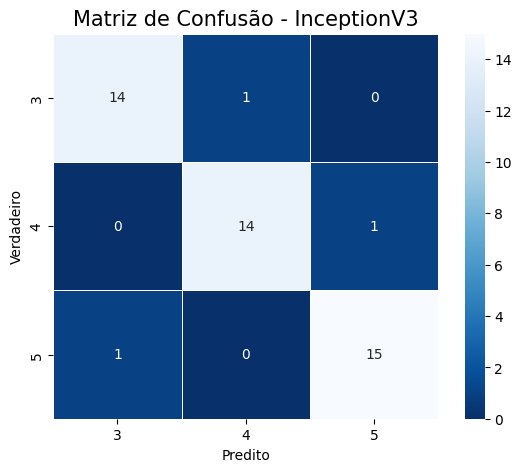

[INFO]: Plotando a matriz de confusão -- GEN


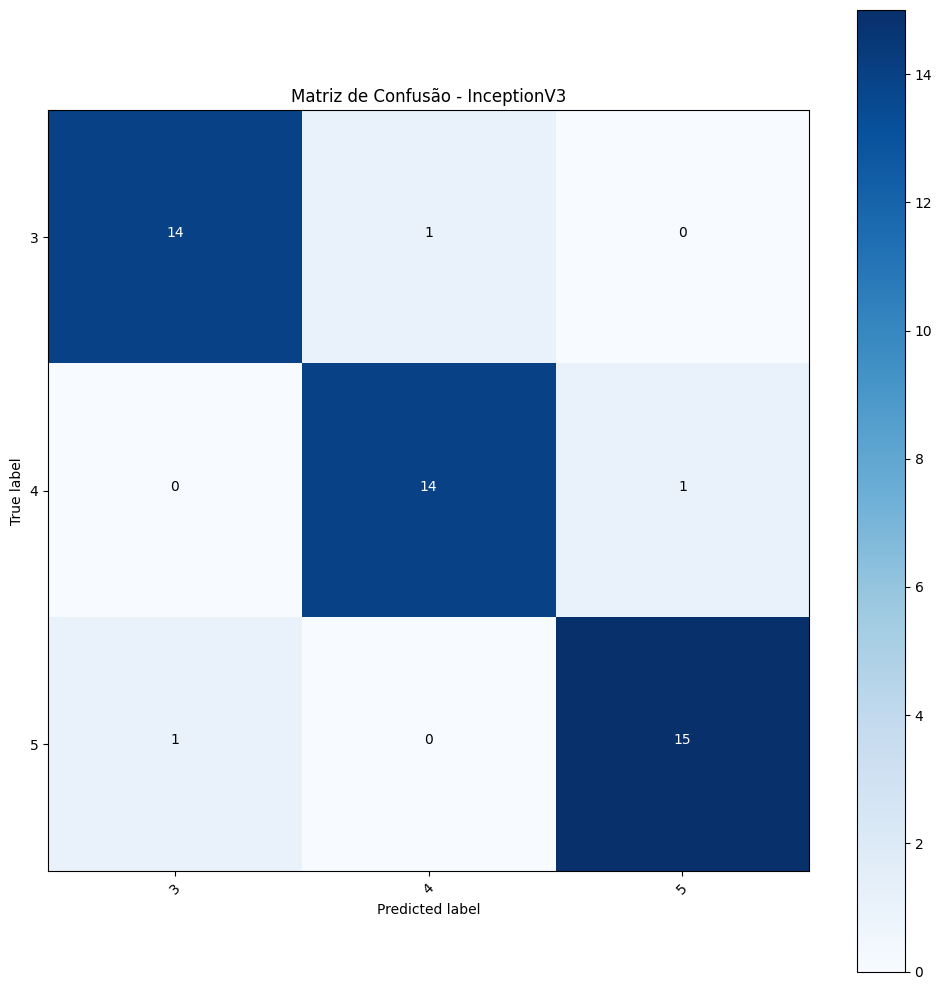

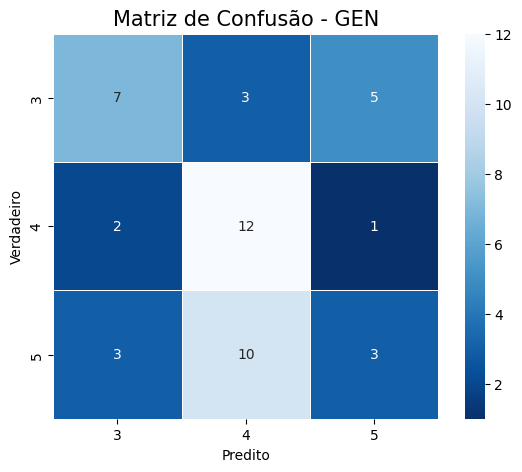

[INFO]: Plotando a matriz de confusão -- VGG


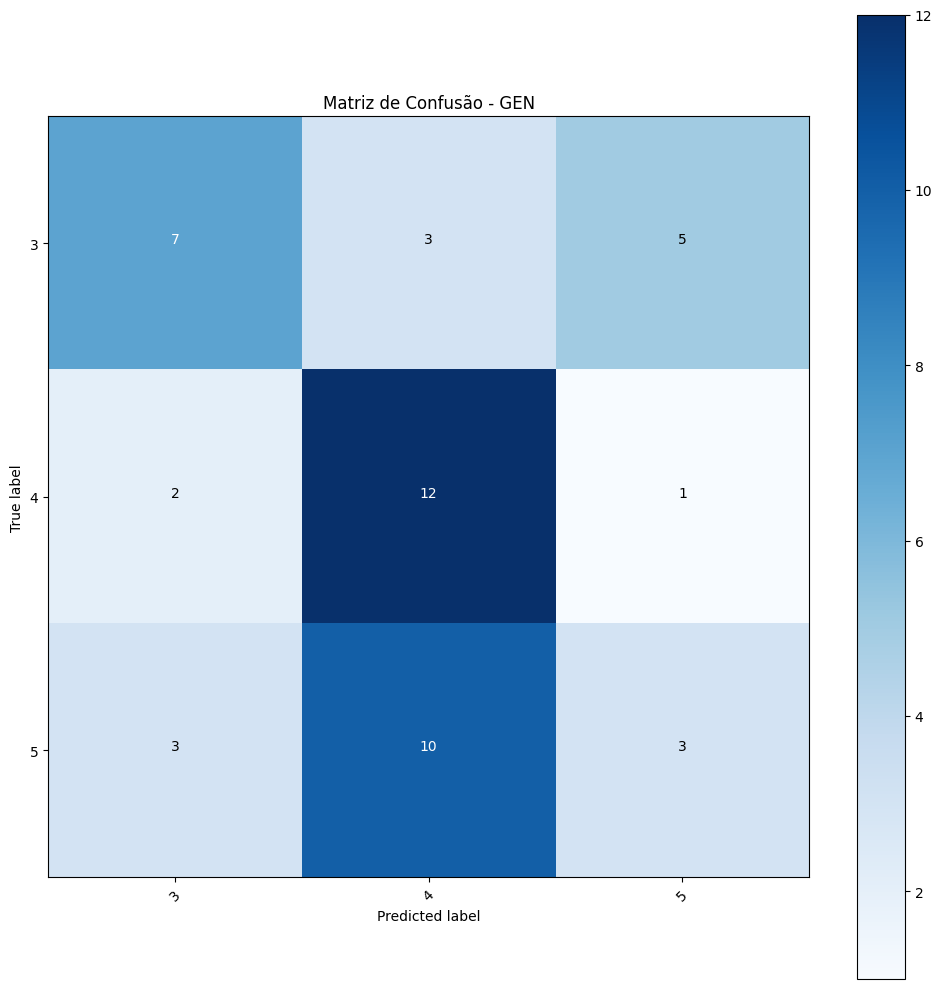

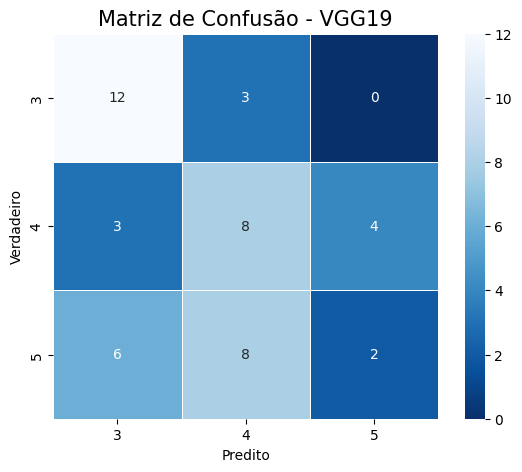

[INFO]: Classification Report Inception V3
              precision    recall  f1-score   support

           3       0.93      0.93      0.93        15
           4       0.93      0.93      0.93        15
           5       0.94      0.94      0.94        16

    accuracy                           0.93        46
   macro avg       0.93      0.93      0.93        46
weighted avg       0.93      0.93      0.93        46

[INFO]: Classification Report gen
              precision    recall  f1-score   support

           3       0.58      0.47      0.52        15
           4       0.48      0.80      0.60        15
           5       0.33      0.19      0.24        16

    accuracy                           0.48        46
   macro avg       0.47      0.48      0.45        46
weighted avg       0.46      0.48      0.45        46

[INFO]: Classification Report VGG19
              precision    recall  f1-score   support

           3       0.57      0.80      0.67        15
           4    

In [ ]:
if __name__ == "__main__":
    main()